In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [27]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
del_cols=['PassengerId','Name', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [32]:
df = df.drop(del_cols, axis=1)


In [33]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [34]:
df.shape

(891, 6)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [37]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [39]:
for col in df.columns:
    df[col] = df[col].fillna(method='ffill')


In [40]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [41]:
df=df.fillna(df['Age'].mean())

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [43]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [44]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()


In [46]:
df['Sex']=le.fit_transform(df['Sex'])

In [47]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [48]:
X = df.drop(['Survived'], axis=1)

y = df['Survived']

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [53]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((596, 5), (295, 5))

In [54]:
X_train.dtypes

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
dtype: object

In [55]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch
6,1,1,54.0,0,0
718,3,1,27.0,0,0
685,2,1,25.0,1,2
73,3,1,26.0,1,0
882,3,0,22.0,0,0


In [56]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch
709,3,1,22.0,1,1
439,2,1,31.0,0,0
840,3,1,20.0,0,0
720,2,0,6.0,0,1
39,3,0,14.0,1,0


In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)



clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [62]:
y_pred_gini = clf_gini.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7831


In [65]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8054


In [67]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8054
Test set score: 0.7831


[Text(0.5, 0.875, 'x[1] <= 0.5\ngini = 0.467\nsamples = 596\nvalue = [374, 222]'),
 Text(0.25, 0.625, 'x[0] <= 2.5\ngini = 0.4\nsamples = 206\nvalue = [57, 149]'),
 Text(0.125, 0.375, 'x[2] <= 2.5\ngini = 0.072\nsamples = 107\nvalue = [4, 103]'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1875, 0.125, 'gini = 0.056\nsamples = 105\nvalue = [3, 102]'),
 Text(0.375, 0.375, 'x[4] <= 3.5\ngini = 0.498\nsamples = 99\nvalue = [53, 46]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 94\nvalue = [48, 46]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.625, 'x[2] <= 3.5\ngini = 0.304\nsamples = 390\nvalue = [317, 73]'),
 Text(0.625, 0.375, 'x[0] <= 2.5\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6875, 0.125, 'gini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(0.875, 0.375, 'x[0] <= 1.5\ngini = 0.275\nsamples = 370\nvalue = [309, 61]'),
 Text(0.8125, 0.125, '

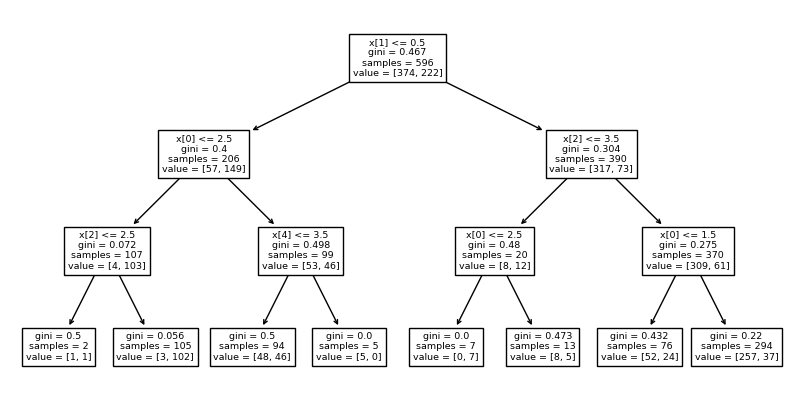

In [68]:
plt.figure(figsize=(10,5))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

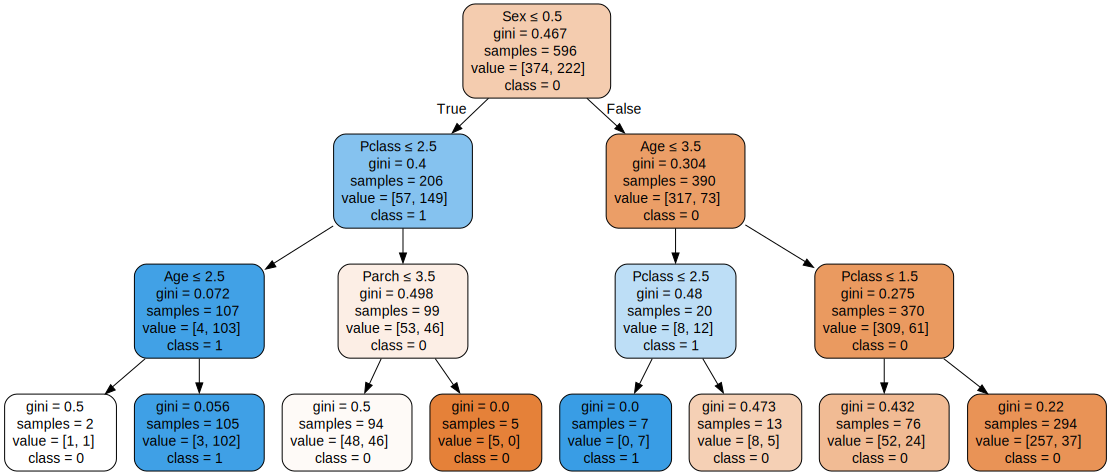

In [70]:
import graphviz 
from sklearn.tree import export_graphviz

# Convert the class labels in y_train to strings
y_train_str = y_train.astype(str)

dot_data = export_graphviz(clf_gini, out_file=None, 
                          feature_names=X_train.columns,  
                          class_names=y_train_str,  # Convert class labels to strings
                          filled=True, rounded=True,  
                          special_characters=True)

graph = graphviz.Source(dot_data) 

graph


In [74]:

from sklearn.metrics import classification_report

# Create and train a decision tree classifier
clf.fit(X_train, y_train)

# Generate predictions on the test data
y_pred = clf.predict(X_test)

# Generate and print the classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.79      0.86      0.83       175
           1       0.77      0.68      0.72       120

    accuracy                           0.79       295
   macro avg       0.78      0.77      0.77       295
weighted avg       0.79      0.79      0.78       295

